In [171]:
# import packages
import pandas as pd

# DATA Ingestion

In [172]:

df = pd.read_csv(r"../..//ML/data/gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


# EDA

In [173]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [174]:
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [175]:
# missing values
df.isnull().sum()
# no missing values observed

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [176]:
df = df.drop(labels="id" , axis=1)
df.head()

# dropping unnecessay columns

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [177]:
# check for duplicate recorde
df.duplicated().sum()


# df.drop_duplicates() to drop duplicates
# no duplicate recorde found

0

In [178]:
# segerate numerical and catagorical columns

numerical_columns = df.columns[df.dtypes != "object"]
catagorical_columns = df.columns[df.dtypes == "object"]

In [179]:
print("numerical columns :", numerical_columns)
print("catagorical_columns :", catagorical_columns )

# spliting because for EDA perpose

numerical columns : Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
catagorical_columns : Index(['cut', 'color', 'clarity'], dtype='object')


In [180]:
df[catagorical_columns].describe() # for catagorical count, unique etc

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [181]:
df[numerical_columns].describe() # for numerical mean max std etc

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [182]:
# get unic values for catagorical columns

for i in catagorical_columns:
    print("catagory lable  : ", i , "-->" , df[i].unique() , "\n" ,"\tThe unique value count is :", df[i].nunique(),"\n")

catagory lable  :  cut --> ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair'] 
 	The unique value count is : 5 

catagory lable  :  color --> ['F' 'J' 'G' 'E' 'D' 'H' 'I'] 
 	The unique value count is : 7 

catagory lable  :  clarity --> ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1'] 
 	The unique value count is : 8 



In [183]:
for i in catagorical_columns:
    print("value count :", df[i].value_counts(),"\n")

value count : cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64 

value count : color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64 

value count : clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64 



# Plotting graphs

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
x = 0

<Figure size 1000x1000 with 0 Axes>

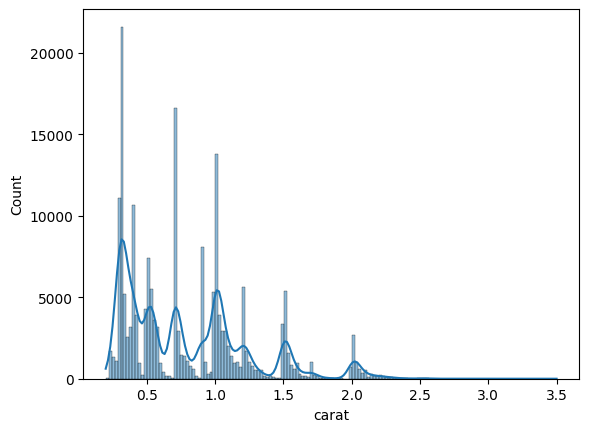

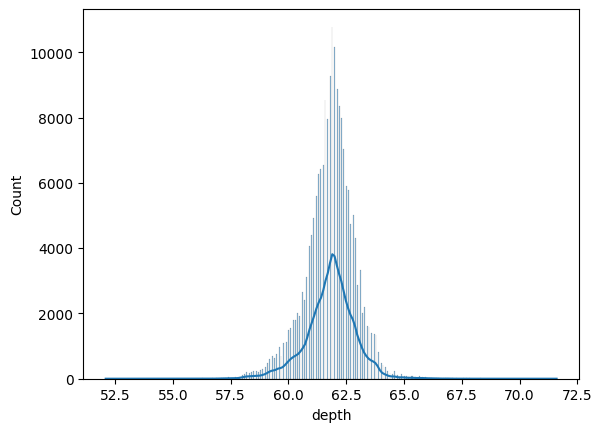

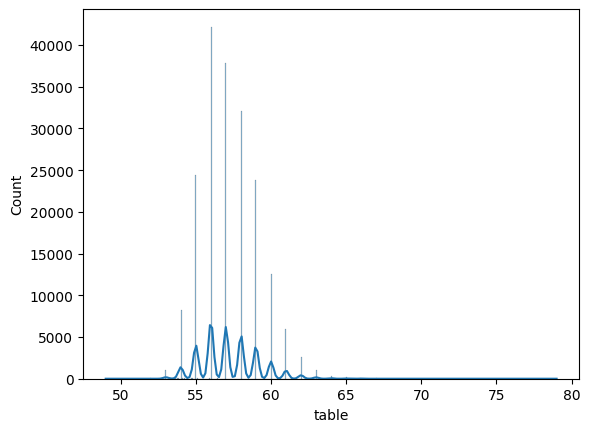

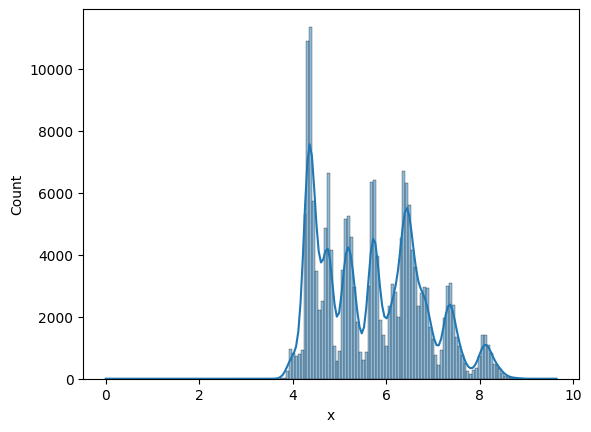

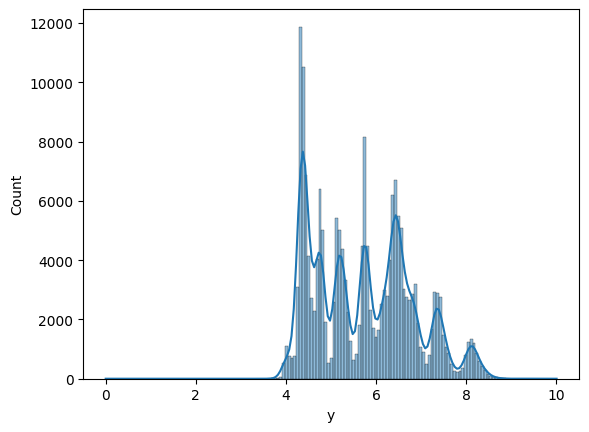

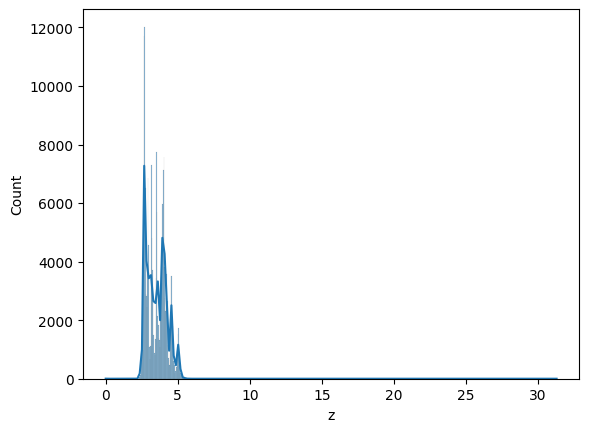

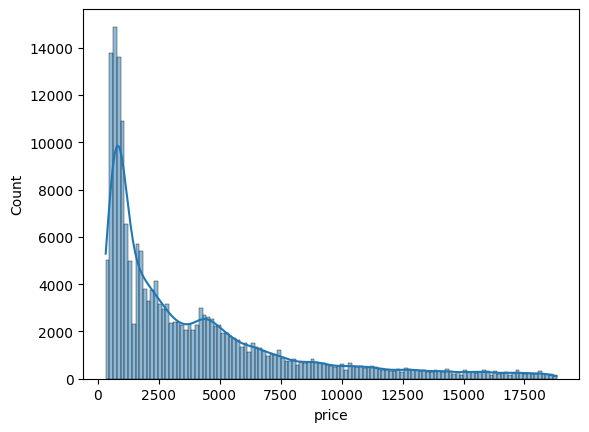

In [185]:
for i in numerical_columns:
    sns.histplot(data=df,x=i, kde=True)   # you can specify columns via x variable or simple pass df[i] inside the data parameter
    # dist plot is also ther , heatmap is ther and other plots for numerical columns for  EDA and understand the data
    plt.show()

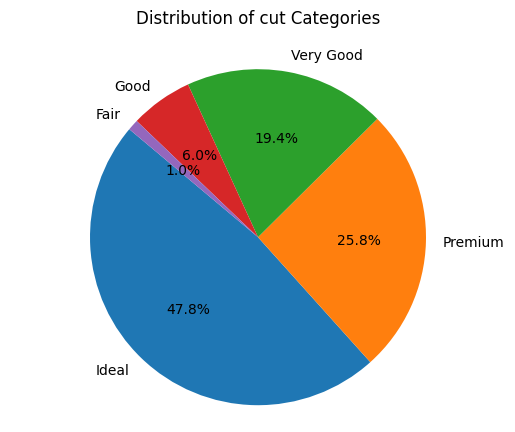

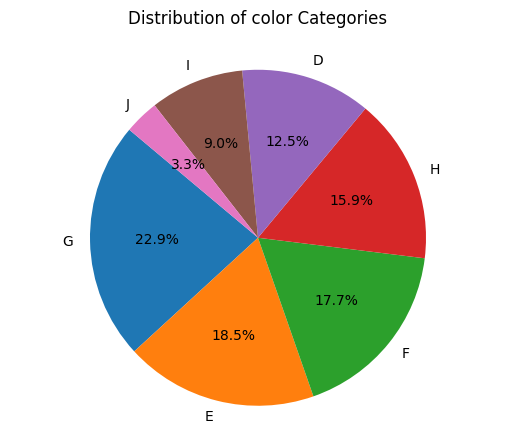

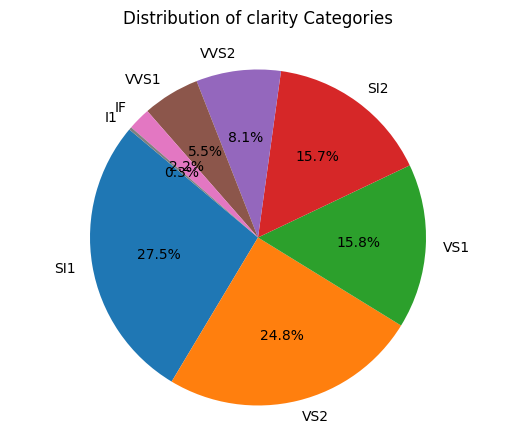

In [186]:
import matplotlib.pyplot as plt
for i in catagorical_columns:
    # Assuming df is your DataFrame and "cut" is the categorical column
    data = df[i].value_counts()
    labels = data.index 
    sizes = data.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title("Distribution of "+str(i)+" Categories\n")
    plt.show()


# correlation

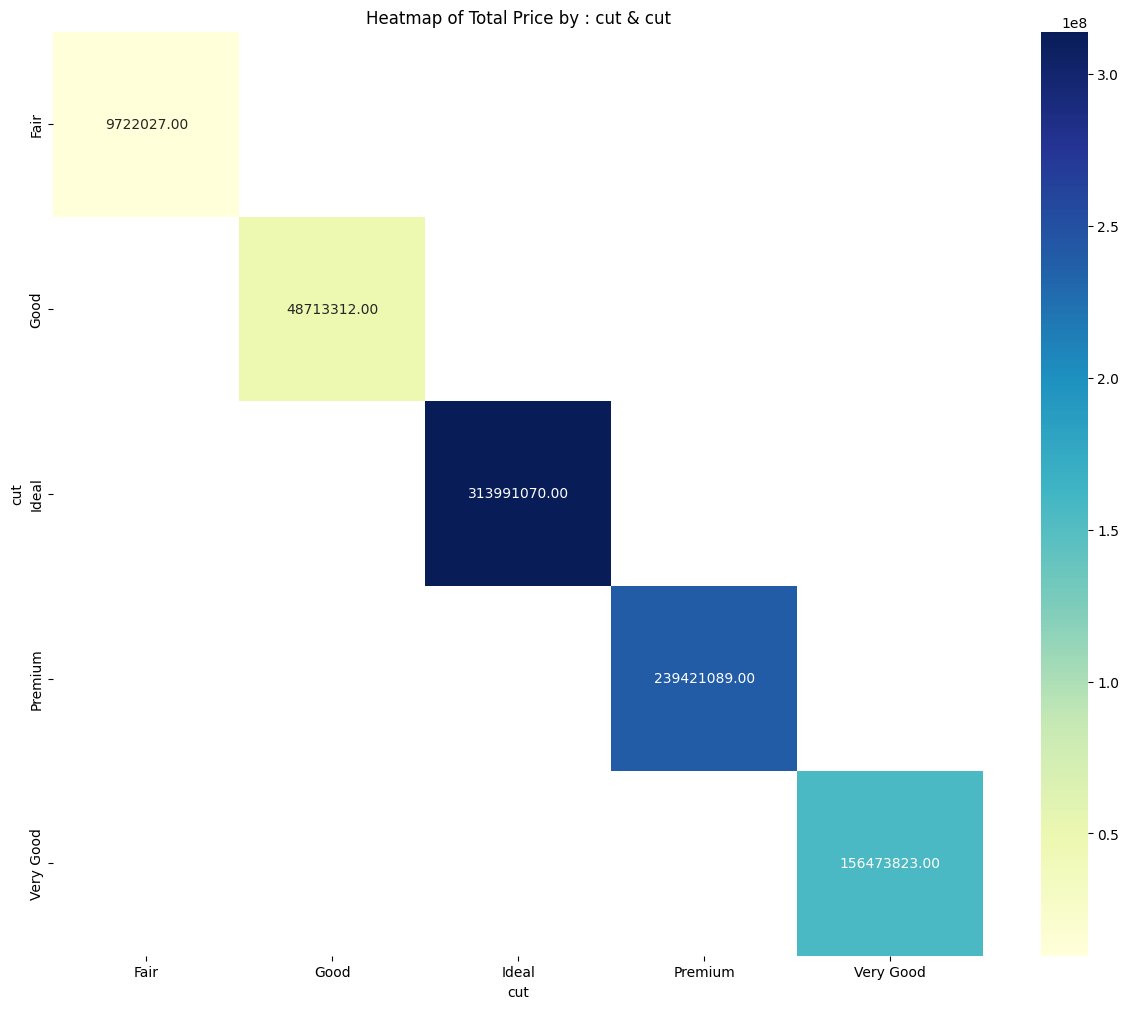

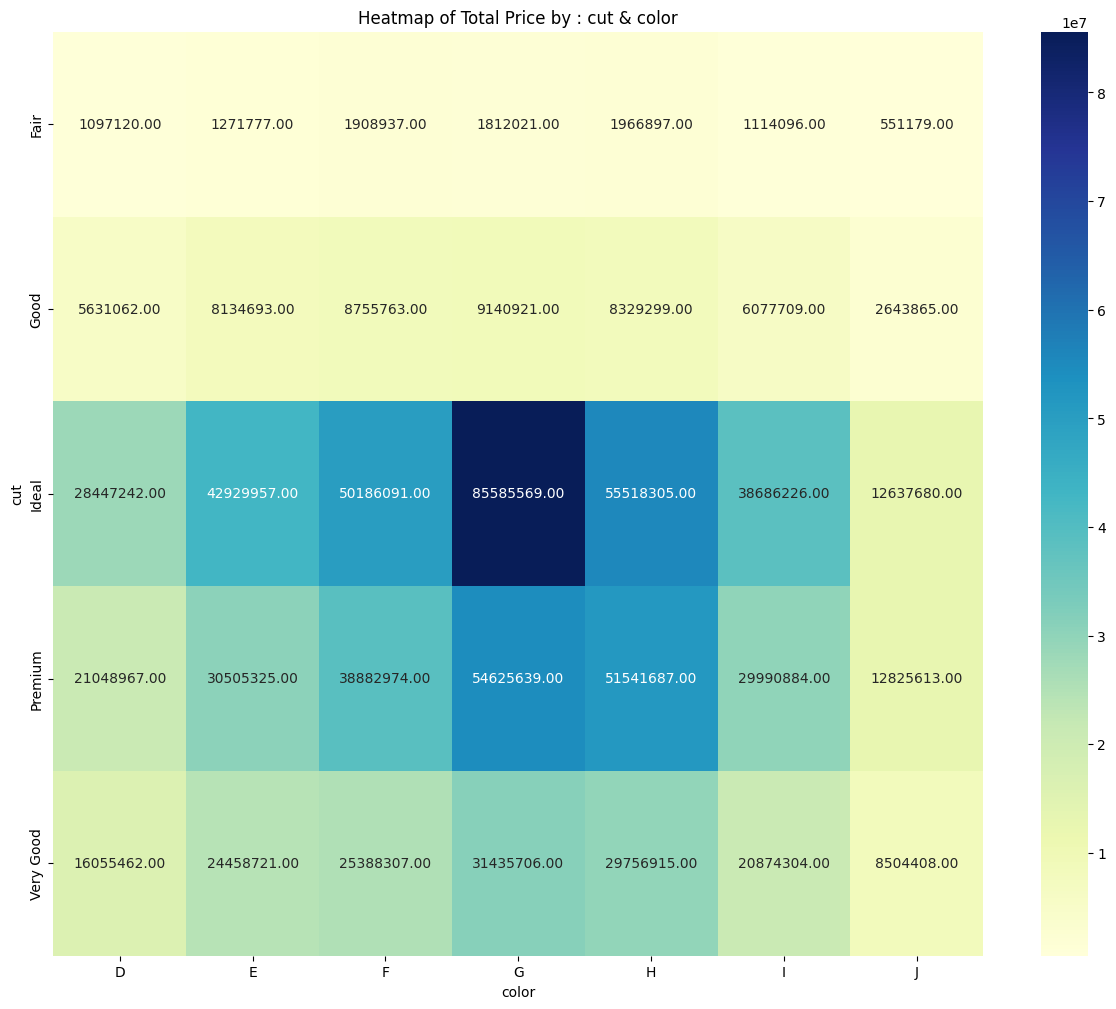

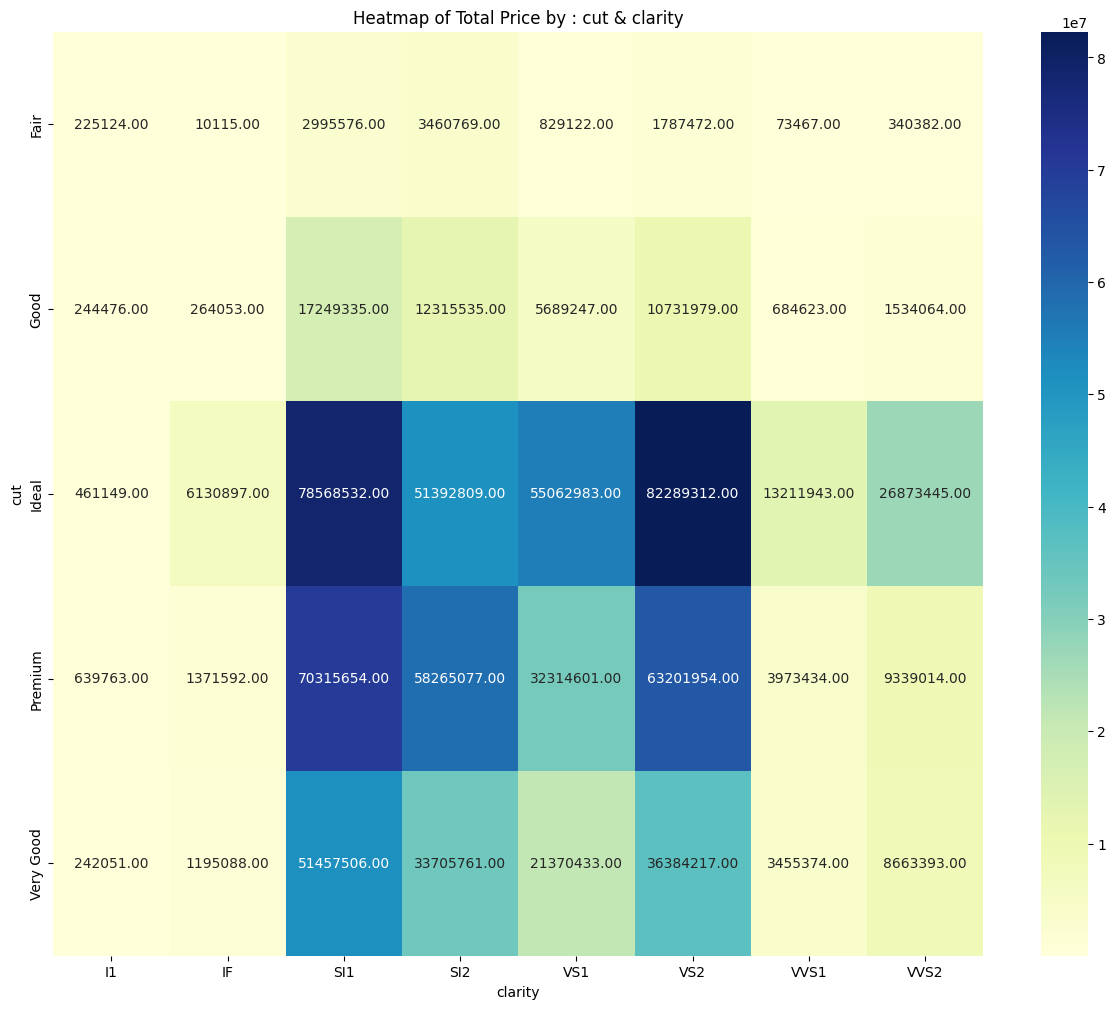

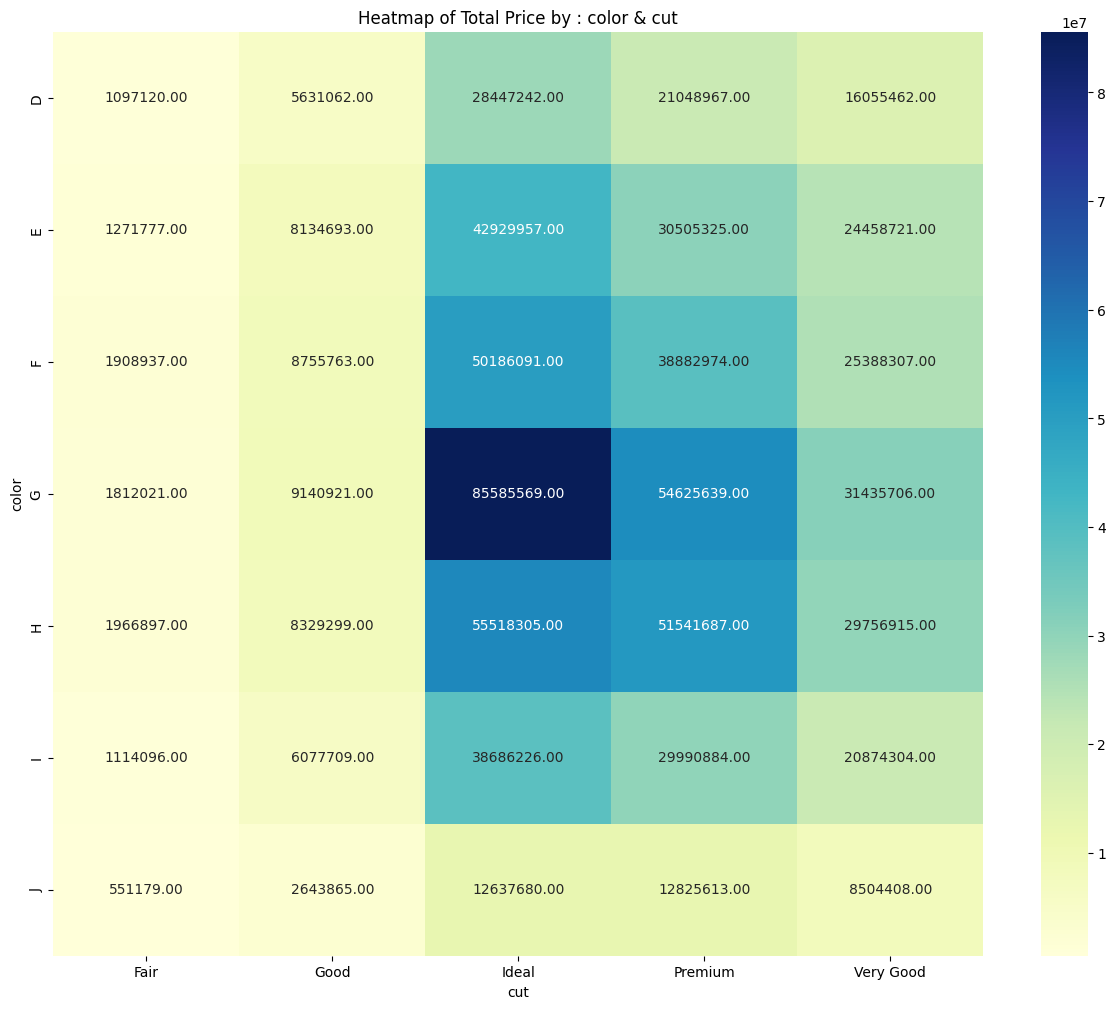

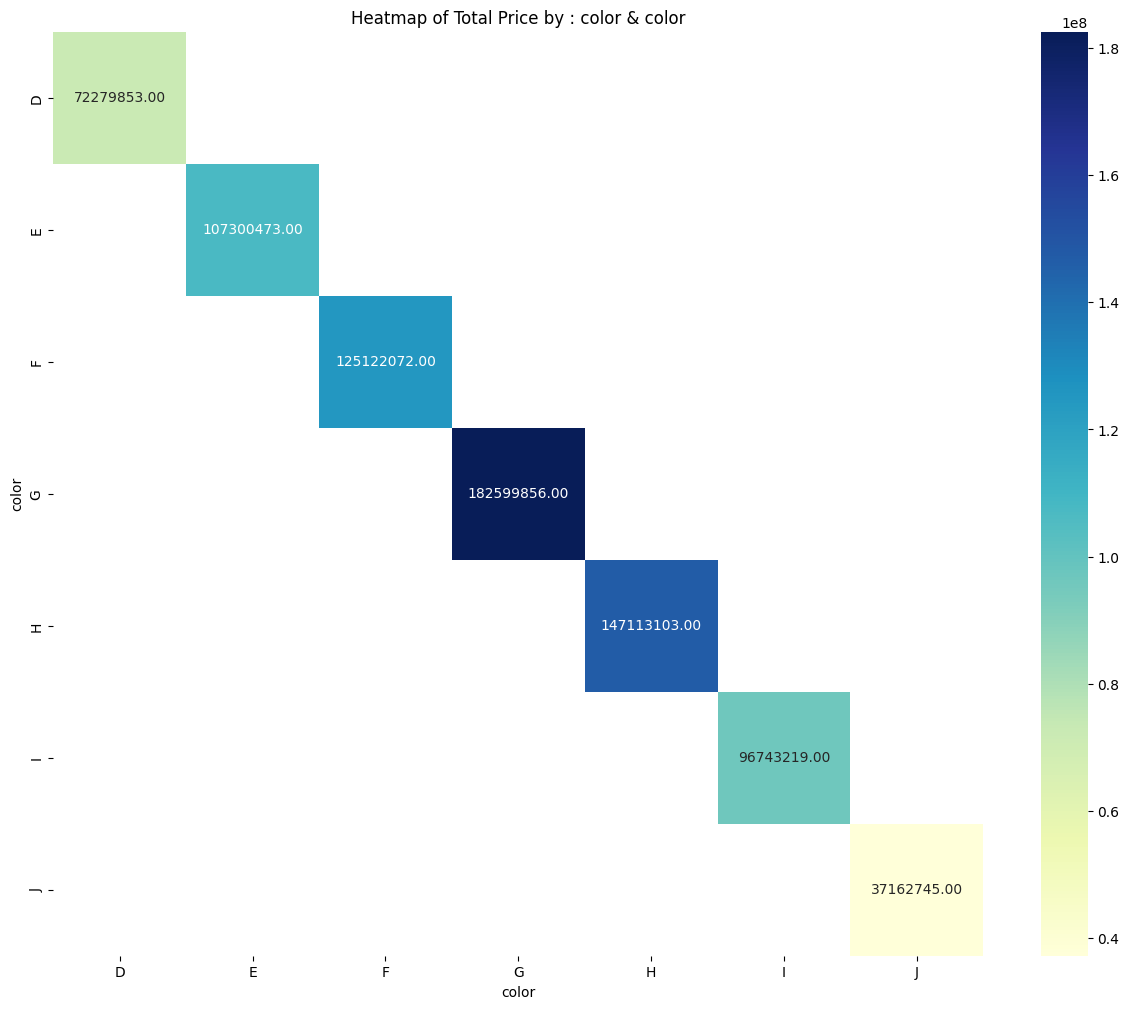

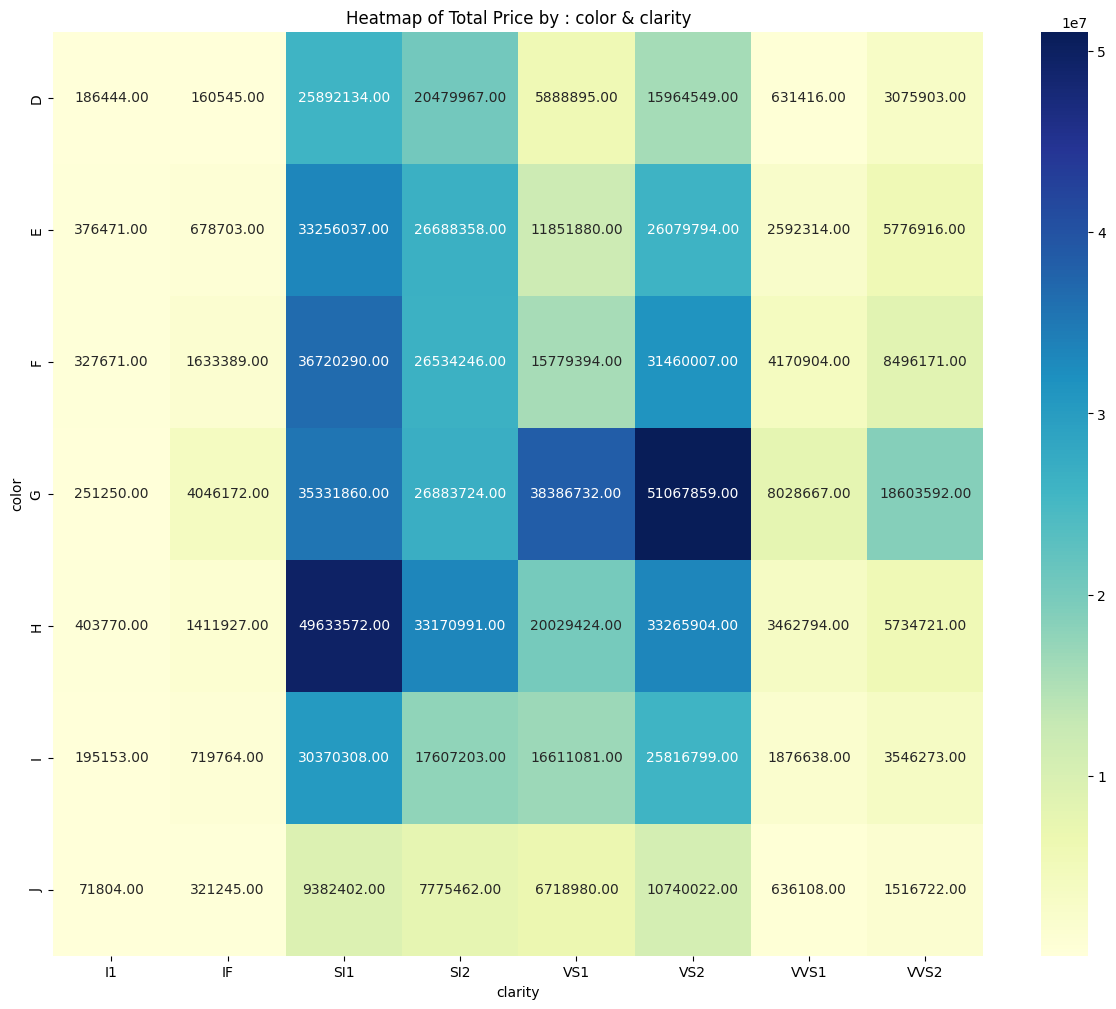

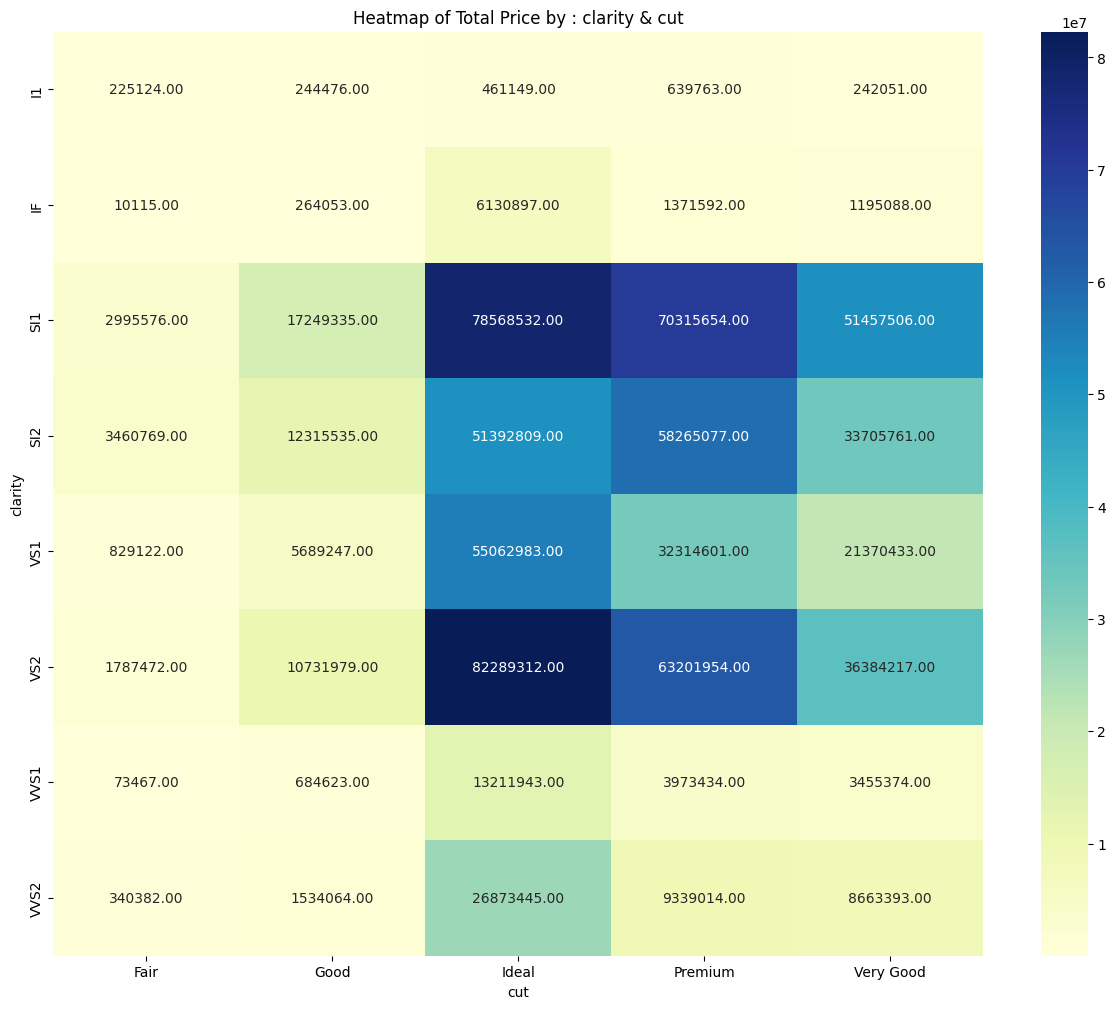

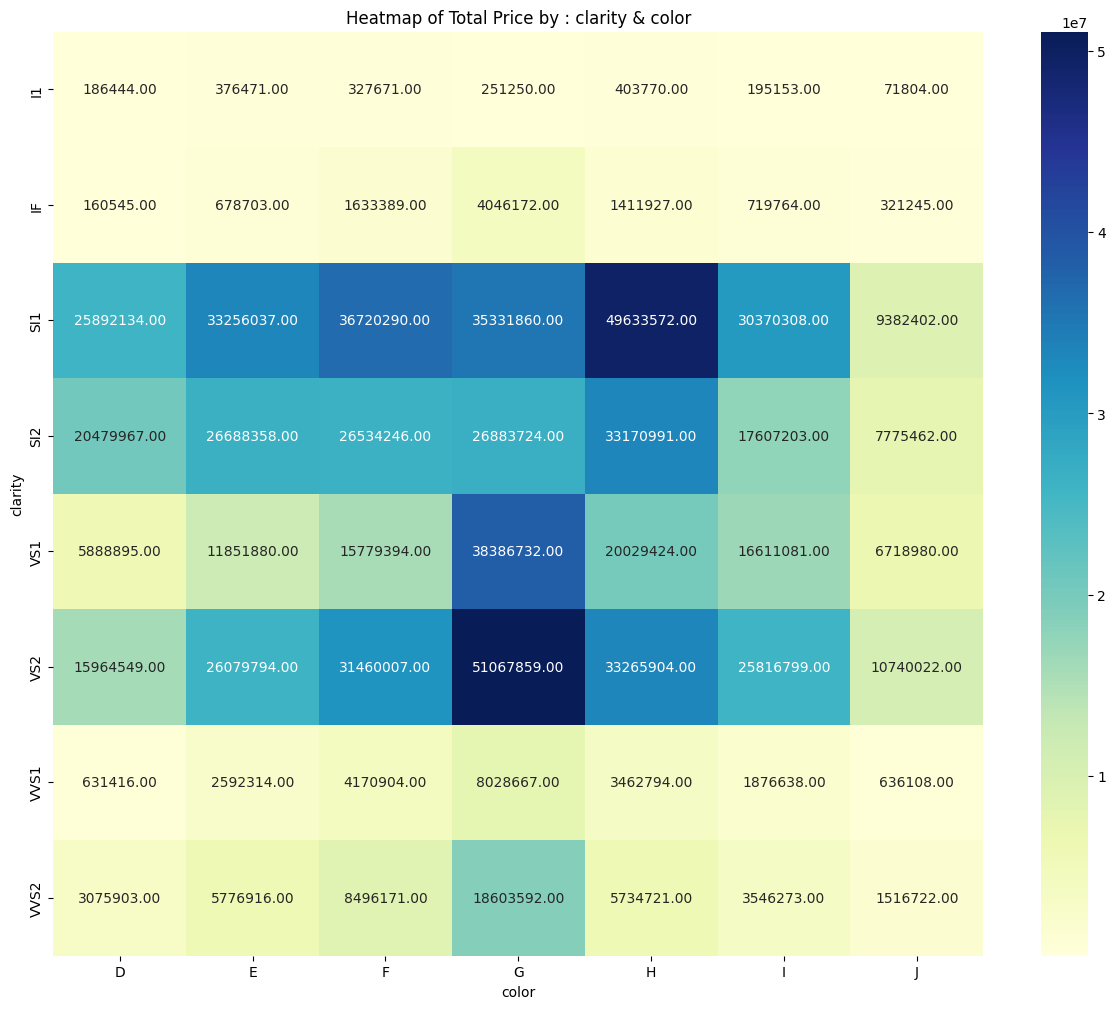

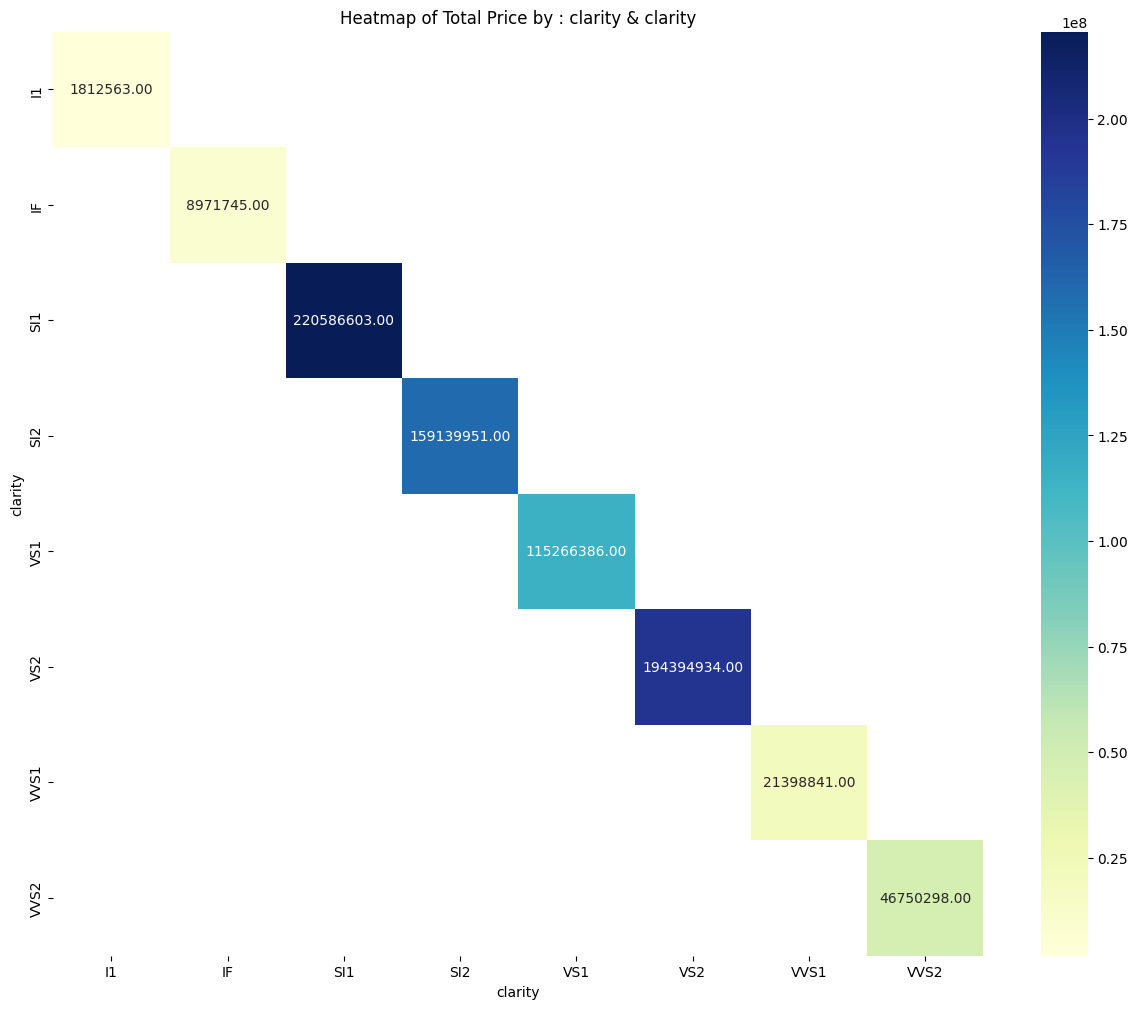

In [221]:
for i in catagorical_columns:
    for j in catagorical_columns:

        # Assuming df is your DataFrame
        heatmap_data = df.groupby([i , j])["price"].sum().unstack()

        plt.figure(figsize=(15, 12))
        sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")

        plt.title("Heatmap of Total Price by : "+i +" & "+ j)
        plt.show()

<Axes: >

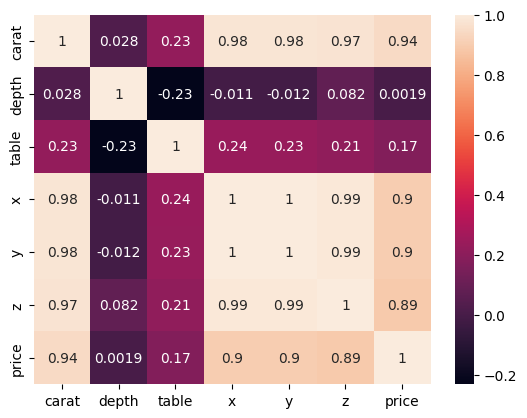

In [222]:
# numerical columns

sns.heatmap(df[numerical_columns].corr(), annot=True)

#### observation - 
> The X,Y,Z are highly corelated to each other. Also these columns are showing high corelation with carat column. 

> The column x y & z will give us carat column. The indipenednt feature when shows high correlation with each other ; it is called as multicolinearity. 

> The high correlation between independent and dependent features are okay for the model for better prediction. But within independent features it will craete a over fitted model  

# FE

In [223]:
# dropping X , y & z columnns


df = df.drop(labels=["x","y","z"], axis=1)

In [224]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,1.52,Premium,F,VS2,62.2,58.0,13619
1,2.03,Very Good,J,SI2,62.0,58.0,13387
2,0.70,Ideal,G,VS1,61.2,57.0,2772
3,0.32,Ideal,G,VS1,61.6,56.0,666
4,1.70,Premium,G,VS2,62.6,59.0,14453


d:\ineuron\Final project submissions\ML\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


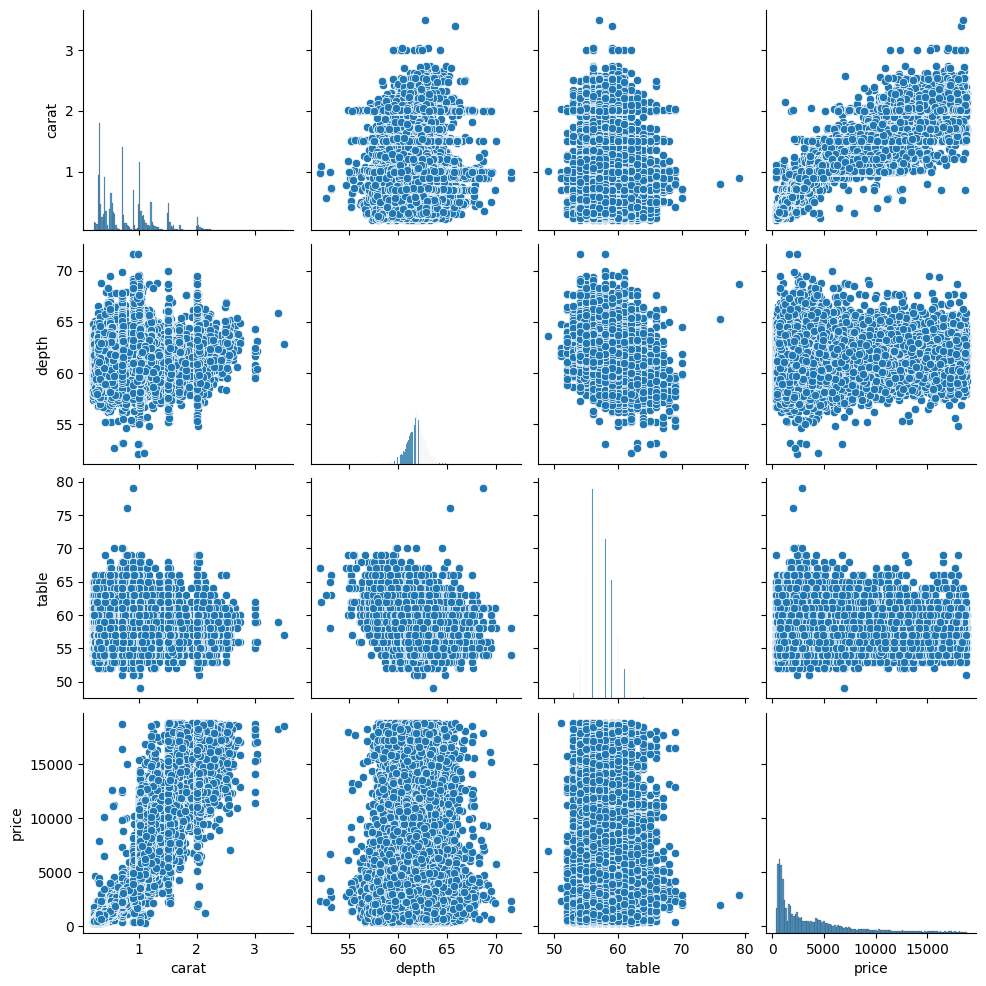

In [225]:
sns.pairplot(df)

In [226]:
# most of them having positive correlation

# Domain knowledge


link - https://www.americangemsociety.org/buying-diamonds-with-confidence/ags-diamond-grading-system/

<img src="https://www.americangemsociety.org/wp-content/uploads/2021/01/AGS%20Color%20Scale-1536x122.png" style="width:1430px;height:220px;">
<img src="https://www.americangemsociety.org/wp-content/uploads/2020/11/AGS%20Clarity%20Scale-1536x544.png" style="width:1430px;height:320px;">

<img src="https://i.pinimg.com/1200x/f5/f9/e3/f5f9e3bf1dfe64054161ede9d7be2242.jpg" style="width:500px;height:420px;" >


<img src="https://i.pinimg.com/736x/8a/bb/63/8abb6350fbf756d0b05a783b1aafffde.jpg" style="width:650px;height:420px;" >


In [232]:
df.color.unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [233]:
# assigning ranks for catagorical feature - convert to numerical features

cut_map = {
    "Fair":1,
    "Good":2,
    'Very Good':3, 
    'Premium':4,
    'Ideal':5
      }   # implies to higher rank higher value

calrity_map = {
    'I1':1,

    'SI2':2,
    'SI1':3,

    'VS2':4, 
    'VS1':5, 


    'VVS2':6, 
    'VVS1':7,

    'IF':8, 
    } # implies to better quality with higher rank


color_map = {
    'D':1,
    'E':2, 
    'F':3, 
    'G':4,     
    'H':5,     
    'I':6,
    'J':7
    } # implies to the yellow colour ranking as per standard diamond rank


In [236]:
# mapping values you can use replace or map function

for i in catagorical_columns:
    if i.lower() == "cut":
        df[i] = df[i].map(cut_map)
    elif i.lower()=="clarity":
        df[i] = df[i].map(calrity_map)
    elif i.lower() == "color":
        df[i] = df[i].replace(color_map)
 
 
 
df.head() 

,carat,cut,color,clarity,depth,table,price
0,1.52,4,3,4,62.2,58.0,13619
1,2.03,3,7,2,62.0,58.0,13387
2,0.70,5,4,5,61.2,57.0,2772
3,0.32,5,4,5,61.6,56.0,666
4,1.70,4,4,4,62.6,59.0,14453
